In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt


In [ ]:

path = 'ex2data2.txt'

data = pd.read_csv(path, header=None, 
                   names=['Test 1', 'Test 2', 'Accepted'])

print('data = ')
print(data.head(10) )
print('................................................')
print('data.describe = ')
print(data.describe())

data = 
     Test 1    Test 2  Accepted
0  0.051267  0.699560         1
1 -0.092742  0.684940         1
2 -0.213710  0.692250         1
3 -0.375000  0.502190         1
4 -0.513250  0.465640         1
5 -0.524770  0.209800         1
6 -0.398040  0.034357         1
7 -0.305880 -0.192250         1
8  0.016705 -0.404240         1
9  0.131910 -0.513890         1
................................................
data.describe = 
           Test 1      Test 2    Accepted
count  118.000000  118.000000  118.000000
mean     0.054779    0.183102    0.491525
std      0.496654    0.519743    0.502060
min     -0.830070   -0.769740    0.000000
25%     -0.372120   -0.254385    0.000000
50%     -0.006336    0.213455    0.000000
75%      0.478970    0.646563    1.000000
max      1.070900    1.108900    1.000000


In [ ]:
positive = data[data['Accepted'].isin([1])]
negative = data[data['Accepted'].isin([0])]


print('................................................')
print('positive data')
print(positive)
print('................................................')
print('negative data')
print(negative)
print('................................................')


................................................
positive data
      Test 1    Test 2  Accepted
0   0.051267  0.699560         1
1  -0.092742  0.684940         1
2  -0.213710  0.692250         1
3  -0.375000  0.502190         1
4  -0.513250  0.465640         1
5  -0.524770  0.209800         1
6  -0.398040  0.034357         1
7  -0.305880 -0.192250         1
8   0.016705 -0.404240         1
9   0.131910 -0.513890         1
10  0.385370 -0.565060         1
11  0.529380 -0.521200         1
12  0.638820 -0.243420         1
13  0.736750 -0.184940         1
14  0.546660  0.487570         1
15  0.322000  0.582600         1
16  0.166470  0.538740         1
17 -0.046659  0.816520         1
18 -0.173390  0.699560         1
19 -0.478690  0.633770         1
20 -0.605410  0.597220         1
21 -0.628460  0.334060         1
22 -0.593890  0.005117         1
23 -0.421080 -0.272660         1
24 -0.115780 -0.396930         1
25  0.201040 -0.601610         1
26  0.466010 -0.535820         1
27  0.673390 

................................................


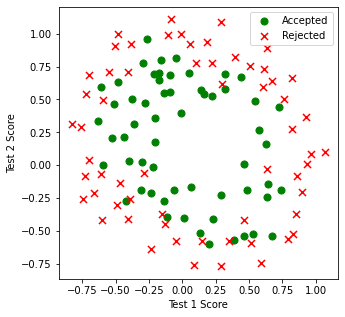

In [ ]:

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(positive['Test 1'], positive['Test 2'],
           s=50, c='g', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'],
           s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')


print('................................................')


In [ ]:

degree = 5

x1 = data['Test 1']
x2 = data['Test 2']

print('x1 \n' ,x1.head(10))
print('................................................')
print('x2 \n' ,x2.head(10))

print('................................................')

data.insert(3, 'Ones', 1)   # adding x0

print('data \n' , data.head(10))
print('................................................')



x1 
 0    0.051267
1   -0.092742
2   -0.213710
3   -0.375000
4   -0.513250
5   -0.524770
6   -0.398040
7   -0.305880
8    0.016705
9    0.131910
Name: Test 1, dtype: float64
................................................
x2 
 0    0.699560
1    0.684940
2    0.692250
3    0.502190
4    0.465640
5    0.209800
6    0.034357
7   -0.192250
8   -0.404240
9   -0.513890
Name: Test 2, dtype: float64
................................................
data 
      Test 1    Test 2  Accepted  Ones
0  0.051267  0.699560         1     1
1 -0.092742  0.684940         1     1
2 -0.213710  0.692250         1     1
3 -0.375000  0.502190         1     1
4 -0.513250  0.465640         1     1
5 -0.524770  0.209800         1     1
6 -0.398040  0.034357         1     1
7 -0.305880 -0.192250         1     1
8  0.016705 -0.404240         1     1
9  0.131910 -0.513890         1     1
................................................


'\nx1 + x1^2 + x1x2 + x1^3 + x1^2 x2 + x1 x2^2 + x1^4 + x1^3 x2 + x1^2 x2^2 + x1 x2^3\n\n\nF10 = x1\n\nF20 = x1^2\nF21 = x1 x2\n\nF30 = x1^3\nF31 = x1^2 x2\nF32 = x1 x2^2\n\nF40 = x1^4\nF41 = x1^3 x2\nF42 = x1^2 x2^2\nF43 = x1 x2^3 \n\n'

In [ ]:
'''
x1 + x1^2 + x1x2 + x1^3 + x1^2 x2 + x1 x2^2 + x1^4 + x1^3 x2 + x1^2 x2^2 + x1 x2^3


F10 = x1

F20 = x1^2
F21 = x1 x2

F30 = x1^3
F31 = x1^2 x2
F32 = x1 x2^2

F40 = x1^4
F41 = x1^3 x2
F42 = x1^2 x2^2
F43 = x1 x2^3 

'''

for i in range(1, degree): # 1,2,3,4
    for j in range(0, i):  # 0 , 1 , 2 ,2
        data['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j) # i=3 , j=2

data.drop('Test 1', axis=1, inplace=True)
data.drop('Test 2', axis=1, inplace=True)

print('data \n' , data.head(10))

print('................................................')



data 
    Accepted  Ones       F10       F20       F21       F30       F31       F32  \
0         1     1  0.051267  0.002628  0.035864  0.000135  0.001839  0.025089   
1         1     1 -0.092742  0.008601 -0.063523 -0.000798  0.005891 -0.043509   
2         1     1 -0.213710  0.045672 -0.147941 -0.009761  0.031616 -0.102412   
3         1     1 -0.375000  0.140625 -0.188321 -0.052734  0.070620 -0.094573   
4         1     1 -0.513250  0.263426 -0.238990 -0.135203  0.122661 -0.111283   
5         1     1 -0.524770  0.275384 -0.110097 -0.144513  0.057775 -0.023098   
6         1     1 -0.398040  0.158436 -0.013675 -0.063064  0.005443 -0.000470   
7         1     1 -0.305880  0.093563  0.058805 -0.028619 -0.017987 -0.011305   
8         1     1  0.016705  0.000279 -0.006753  0.000005 -0.000113  0.002730   
9         1     1  0.131910  0.017400 -0.067787  0.002295 -0.008942  0.034835   

            F40       F41       F42       F43  
0  6.907989e-06  0.000094  0.001286  0.017551  
1  7.

In [8]:


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def costReg(theta, X, y, lr ):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (lr / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    
     
    return np.sum(first - second) / (len(X)) + reg




def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] =(np.sum(term)/len(X))+((learningRate/len(X))*theta[:,i])
    
    return grad

# set X and y (remember from above that we moved the label to column 0)
cols = data.shape[1]
print('cols = ' , cols)
print('................................................')

X2 = data.iloc[:,1:cols]
print('X2 = ')
print(X2.head(10))
print('................................................')

y2 = data.iloc[:,0:1]
print('y2 = ')
print(y2.head(10))
print('................................................')

cols =  12
................................................
X2 = 
   Ones       F10       F20       F21       F30       F31       F32  \
0     1  0.051267  0.002628  0.035864  0.000135  0.001839  0.025089   
1     1 -0.092742  0.008601 -0.063523 -0.000798  0.005891 -0.043509   
2     1 -0.213710  0.045672 -0.147941 -0.009761  0.031616 -0.102412   
3     1 -0.375000  0.140625 -0.188321 -0.052734  0.070620 -0.094573   
4     1 -0.513250  0.263426 -0.238990 -0.135203  0.122661 -0.111283   
5     1 -0.524770  0.275384 -0.110097 -0.144513  0.057775 -0.023098   
6     1 -0.398040  0.158436 -0.013675 -0.063064  0.005443 -0.000470   
7     1 -0.305880  0.093563  0.058805 -0.028619 -0.017987 -0.011305   
8     1  0.016705  0.000279 -0.006753  0.000005 -0.000113  0.002730   
9     1  0.131910  0.017400 -0.067787  0.002295 -0.008942  0.034835   

            F40       F41       F42       F43  
0  6.907989e-06  0.000094  0.001286  0.017551  
1  7.397855e-05 -0.000546  0.004035 -0.029801  
2  2.085

In [9]:
# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(X2.shape[1])

print('theta 2 = ' , theta2)
print('................................................')

learningRate = 0.00001


rcost = costReg(theta2, X2, y2, learningRate)
print()
print('regularized cost = ' , rcost)
print()



result = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg,
                      args=(X2, y2, learningRate))
print( 'result = ' , result )
print()

theta 2 =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
................................................

regularized cost =  0.6931471805599454

result =  (array([ 0.82012021,  0.65301591, -1.29009486, -2.48327866,  1.32635709,
        0.58250946, -1.985277  , -3.39873558,  0.60749936, -5.86672631,
        1.71119035]), 91, 1)



In [10]:

def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))


accuracy = 86%
